0.0035940403924042924
0.12381795783958277
3.1380455157959206
4.592377531359105
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 2.]
 [0. 0. 0. ... 1. 0. 0.]]


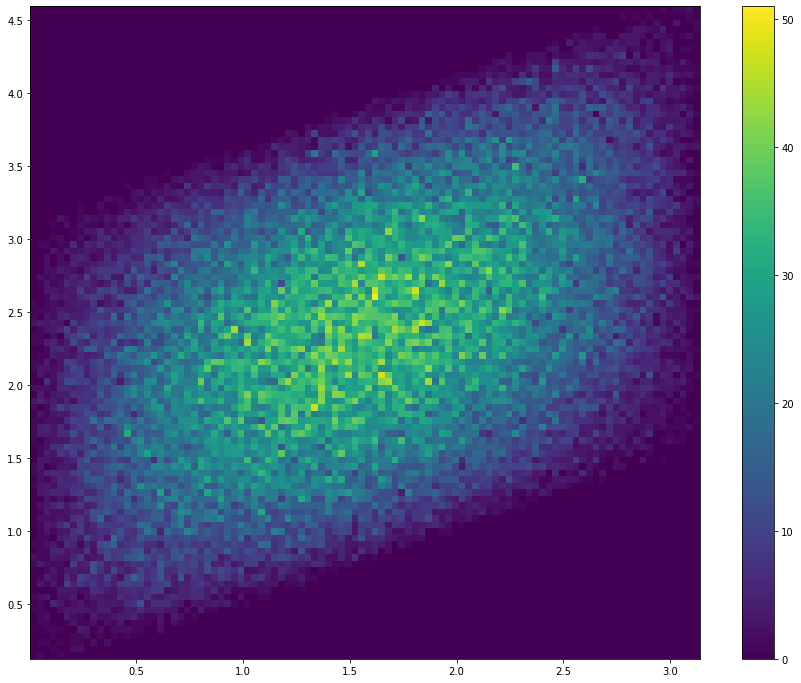

In [1]:
# try a 2d histogram for radiance
import numpy as np
import matplotlib.pyplot as plt

size = 100000
x = np.random.random(size)
x = np.arccos(x*2-1)
y = np.random.random(size)
y = np.arccos(y*2-1)
y = y + x/2
print(np.min(x))
print(np.min(y))

print(np.max(x))
print(np.max(y))


fig=plt.figure(figsize=[15,12])
(h, xedges, yedges, image) = plt.hist2d(x,y,bins=100)
print(h)
plt.colorbar()
plt.show()

In [1]:
# try a 4d histogram

import optics_cuda

source = optics_cuda.MonochromaticLambertianSource(0.001, 0.001, 555, 5e7, 0.001)
photons = source.make_photons(10000000)


/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')
/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


In [2]:
import cupy as cp
import scipy.constants
points = (photons.r_x, photons.r_y, cp.arccos(photons.ez_z), cp.arctan2(photons.ez_y, photons.ez_x)) 
wavelength_m = photons.wavelength_nm * 1e-9
frequency_hz = scipy.constants.c / wavelength_m
energy_per_photon_j = scipy.constants.h * frequency_hz
energy_per_bundle_j = energy_per_photon_j * photons.photons_per_bundle
(h, edges) = cp.histogramdd(points, bins=(20,20,20,20), range=None, weights=energy_per_bundle_j, density=False)

In [3]:
#print(edges[0]) # x (meters)
#print(edges[1]) # y (meters)
#print(edges[2]) # theta (radians)
#print(edges[3]) # phi (radians)

In [6]:
bin_area_sr = cp.outer((cp.cos(edges[2][:-1]) - cp.cos(edges[2][1:])) , (edges[3][1:] - edges[3][:-1]))
bin_area_sr.shape

(20, 20)

In [7]:
bin_area_sr_stretched = bin_area_sr[None,None,:,:]

In [8]:
energy_per_bundle_per_angle_j_sr  = h/bin_area_sr_stretched

In [9]:
max_energy_per_bundle_per_angle_j_sr = cp.amax(energy_per_bundle_per_angle_j_sr, axis=(2,3))

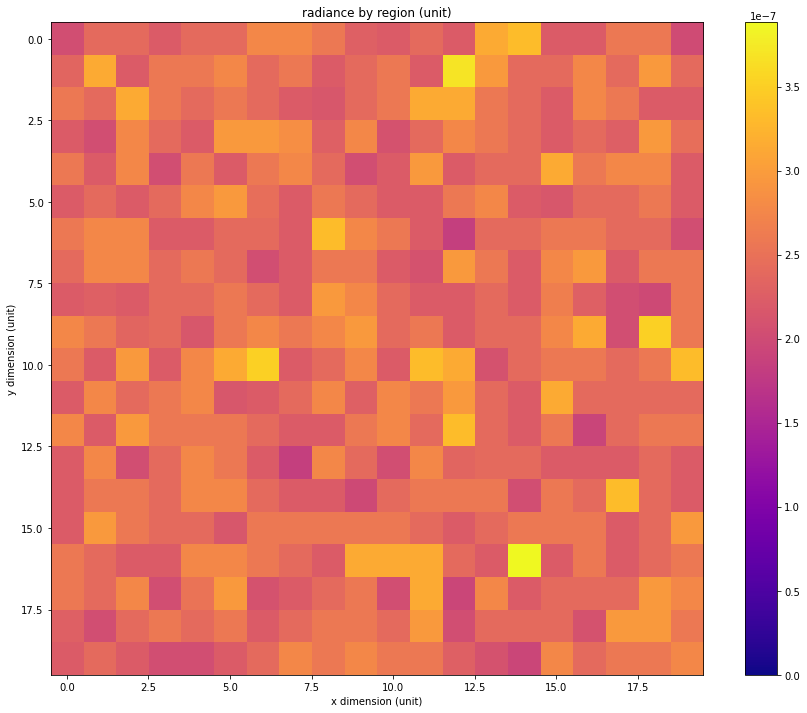

In [22]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=[15,12])
plt.imshow(max_energy_per_bundle_per_angle_j_sr.get(), cmap='plasma', vmin=0) # extent=(0,3,0,2), 
plt.title("radiance by region (unit)")
plt.xlabel("x dimension (unit)")
plt.ylabel("y dimension (unit)")

plt.colorbar()
plt.show()

In [ ]:
fig=plt.figure(figsize=[15,12])
(h, xedges, yedges, image) = plt.hist2d(x,y,bins=100)
print(h)
plt.colorbar()
plt.show()